In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
# Import the 'friends' dataset
path = '../../data/friends.csv'
friends = pd.read_csv(path)

In [3]:
# Take a look at the data
friends.head()

,gender,friends
0,FEMALE,466
1,MALE,323
2,MALE,336
3,FEMALE,1
4,FEMALE,50


This data comes from a random sample of users of our fake social networking website. For each user, we have their gender and the number of friends they have on the site. **We want to figure out if men have more friends, on average, than women, at a 95% confidence level.**

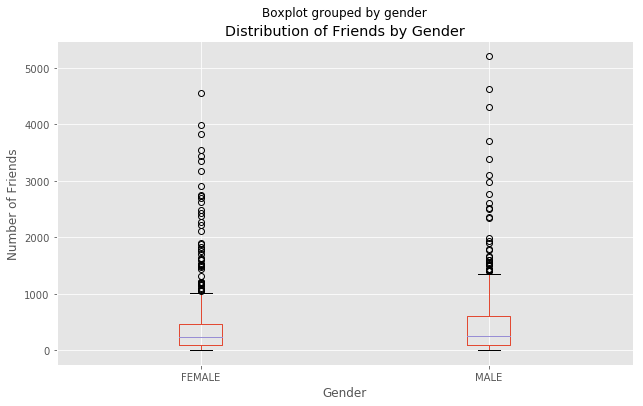

In [4]:
# Plot the distribution of the data. Choose whichever graph you feel is most appropriate.
friends.boxplot(by='gender', figsize=(10,6))

plt.title('Distribution of Friends by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Friends')

In [62]:
# Compute a bootstrap for MALE
male = friends[friends.gender == 'MALE'].friends
male_mean = male.mean()
male_boot = pd.DataFrame(np.random.choice(male, replace=True, size=(male.size, 10000)))

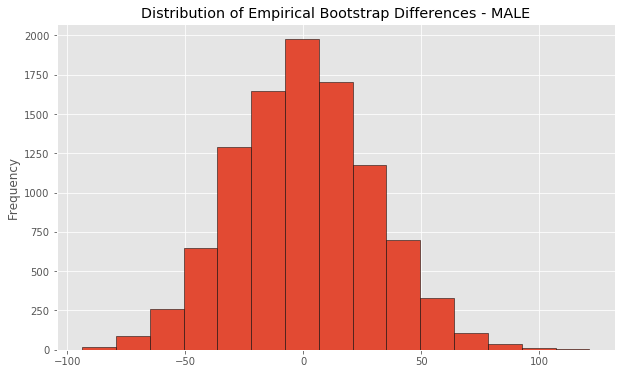

In [63]:
# Plot the distribution of the deltas
male_diff = male_boot.mean() - male_mean
male_diff.plot(
    kind='hist', 
    figsize=(10,6), 
    ec='black',
    bins=15,
)

plt.title('Distribution of Empirical Bootstrap Differences - MALE')

In [64]:
print '95% Confidence Interval for Male:', (male_mean + male_diff.quantile(0.05), male_mean + male_diff.quantile(0.95))

95% Confidence Interval for Male: (431.9801502145923, 528.3520386266094)


In [65]:
# Compute a bootstrap for FEMALE
female = friends[friends.gender == 'FEMALE'].friends
female_mean = female.mean()
female_boot = pd.DataFrame(np.random.choice(female, replace=True, size=(female.size, 10000)))

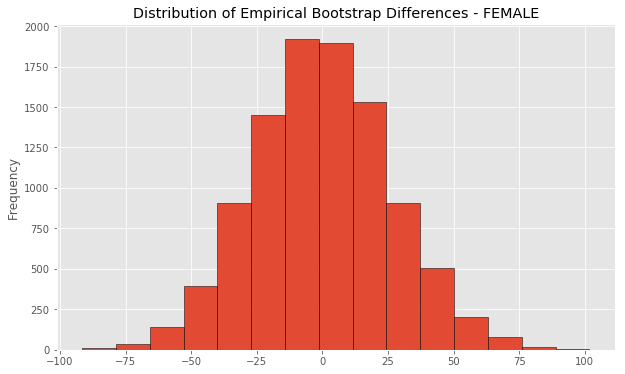

In [68]:
# Plot the distribution of the deltas
female_diff = female_boot.mean() - female_mean
female_diff.plot(
    kind='hist', 
    figsize=(10,6), 
    ec='black',
    bins=15,
)

plt.title('Distribution of Empirical Bootstrap Differences - FEMALE')

In [69]:
print '95% Confidence Interval for Female:', (female_mean + female_diff.quantile(0.05), female_mean + female_diff.quantile(0.95))

95% Confidence Interval for Female: (372.15337078651686, 457.90711610486886)
